In [ ]:
import pandas as pd

apple_raw = pd.read_csv("Applee.csv")
sp500_raw = pd.read_csv("SP500.csv")

apple = apple_raw.drop(index=0).reset_index(drop=True)
sp500 = sp500_raw.drop(index=0).reset_index(drop=True)

# Rename 'Price' column to 'Date'
apple.rename(columns={"Price": "Date"}, inplace=True)
sp500.rename(columns={"Price": "Date"}, inplace=True)

# Convert numeric columns and round
apple.iloc[:, 1:] = apple.iloc[:, 1:].apply(pd.to_numeric, errors='coerce').round(2)
sp500.iloc[:, 1:] = sp500.iloc[:, 1:].apply(pd.to_numeric, errors='coerce').round(2)

# Convert Date to datetime
apple["Date"] = pd.to_datetime(apple["Date"], format="%Y-%m-%d", errors="coerce")
sp500["Date"] = pd.to_datetime(sp500["Date"], format="%Y-%m-%d", errors="coerce")

# Drop rows with any missing values
apple_cleaned = apple.dropna()
sp500_cleaned = sp500.dropna()

# Print summaries
print("Apple cleaned:", apple_cleaned.shape)
print("SP500 cleaned:", sp500_cleaned.shape)
print(apple_cleaned.head())
print(sp500_cleaned.head())


✅ Apple cleaned: (2026, 6)
✅ SP500 cleaned: (2026, 6)
        Date  Close   High    Low   Open       Volume
1 2017-03-01  32.47  32.55  31.96  32.03  145658400.0
2 2017-03-02  32.28  32.58  32.23  32.52  104844000.0
3 2017-03-03  32.47  32.48  32.19  32.24   84432400.0
4 2017-03-06  32.37  32.47  32.19  32.37   87000000.0
5 2017-03-07  32.41  32.51  32.24   32.3   69785200.0
        Date    Close     High      Low     Open        Volume
1 2017-03-01  2395.96  2400.98  2380.13  2380.13  4347630000.0
2 2017-03-02  2381.92  2394.75  2380.17  2394.75  3824030000.0
3 2017-03-03  2383.12  2383.89  2375.39  2380.92  3556670000.0
4 2017-03-06  2375.31   2378.8  2367.98  2375.23  3251800000.0
5 2017-03-07  2368.39  2375.12  2365.51  2370.74  3526300000.0


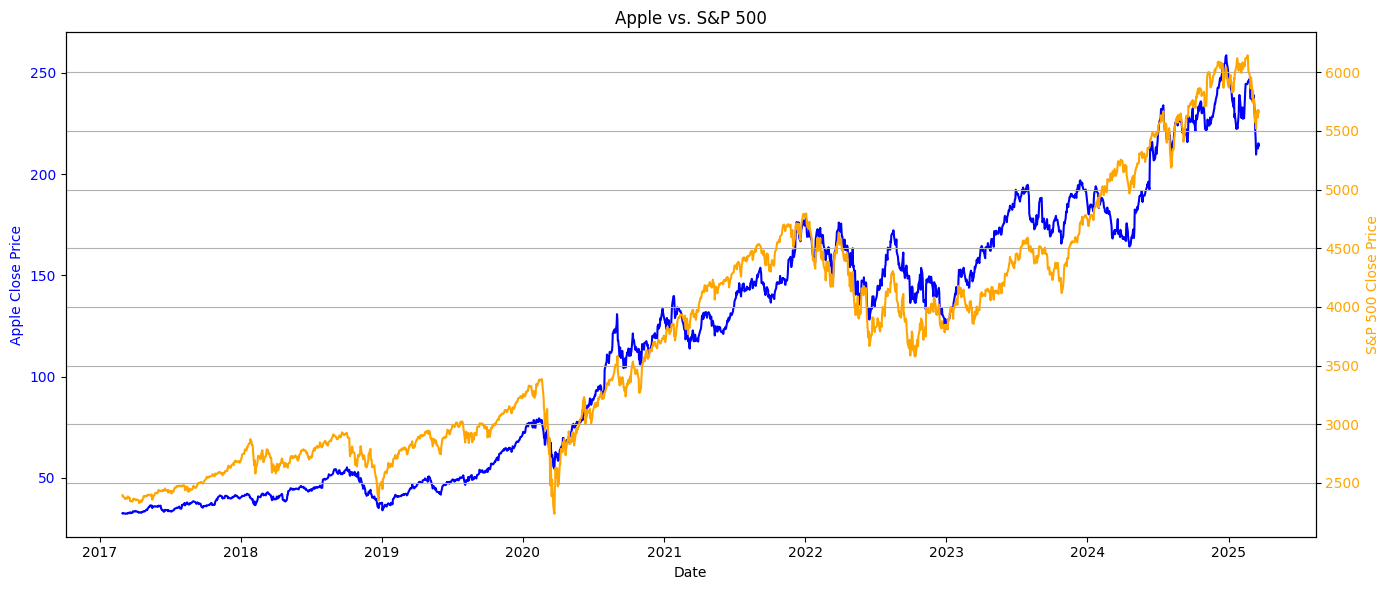

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# No need to convert 'Price' again — 'Date' already exists and is datetime
# Just double-check if needed:
# print(apple_cleaned.dtypes)

# Plot using real datetime on x-axis
fig, ax1 = plt.subplots(figsize=(14, 6))

# Apple on left axis
ax1.plot(apple_cleaned['Date'], apple_cleaned['Close'], color='blue', label='Apple')
ax1.set_ylabel('Apple Close Price', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# S&P 500 on right axis
ax2 = ax1.twinx()
ax2.plot(sp500_cleaned['Date'], sp500_cleaned['Close'], color='orange', label='S&P 500')
ax2.set_ylabel('S&P 500 Close Price', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# X-axis and title
ax1.set_xlabel("Date")
plt.title("Apple vs. S&P 500")
plt.grid(True)
plt.tight_layout()
plt.show()








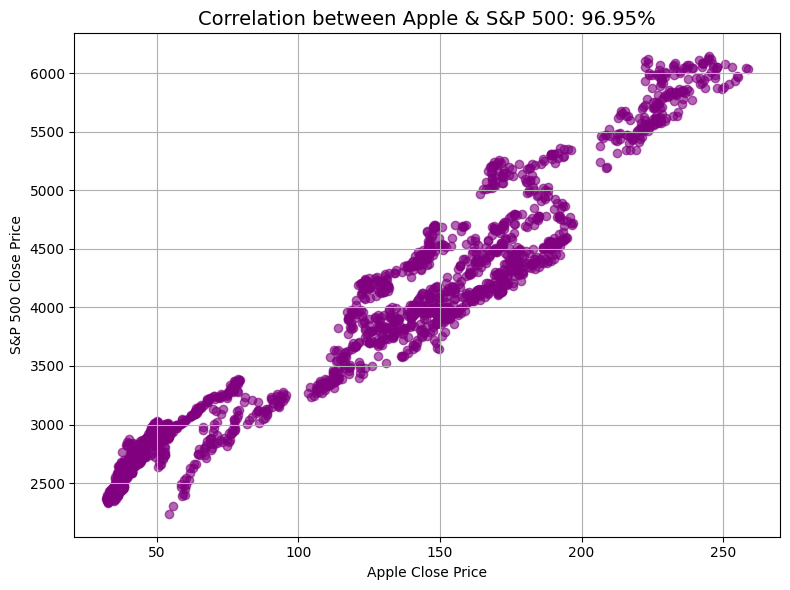

In [ ]:
import matplotlib.pyplot as plt

# Just to be extra safe, align by index (in case any slight mismatch remains)
apple_close = apple_cleaned['Close'].reset_index(drop=True)
sp500_close = sp500_cleaned['Close'].reset_index(drop=True)

# Calculate correlation
correlation = apple_close.corr(sp500_close)
correlation_percent = round(correlation * 100, 2)

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(apple_close, sp500_close, alpha=0.6, color='purple')
plt.title(f'Correlation between Apple & S&P 500: {correlation_percent}%', fontsize=14)
plt.xlabel("Apple Close Price")
plt.ylabel("S&P 500 Close Price")
plt.grid(True)
plt.tight_layout()
plt.show()



<ipython-input-132-8f0644f208bc>:46: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.95])
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


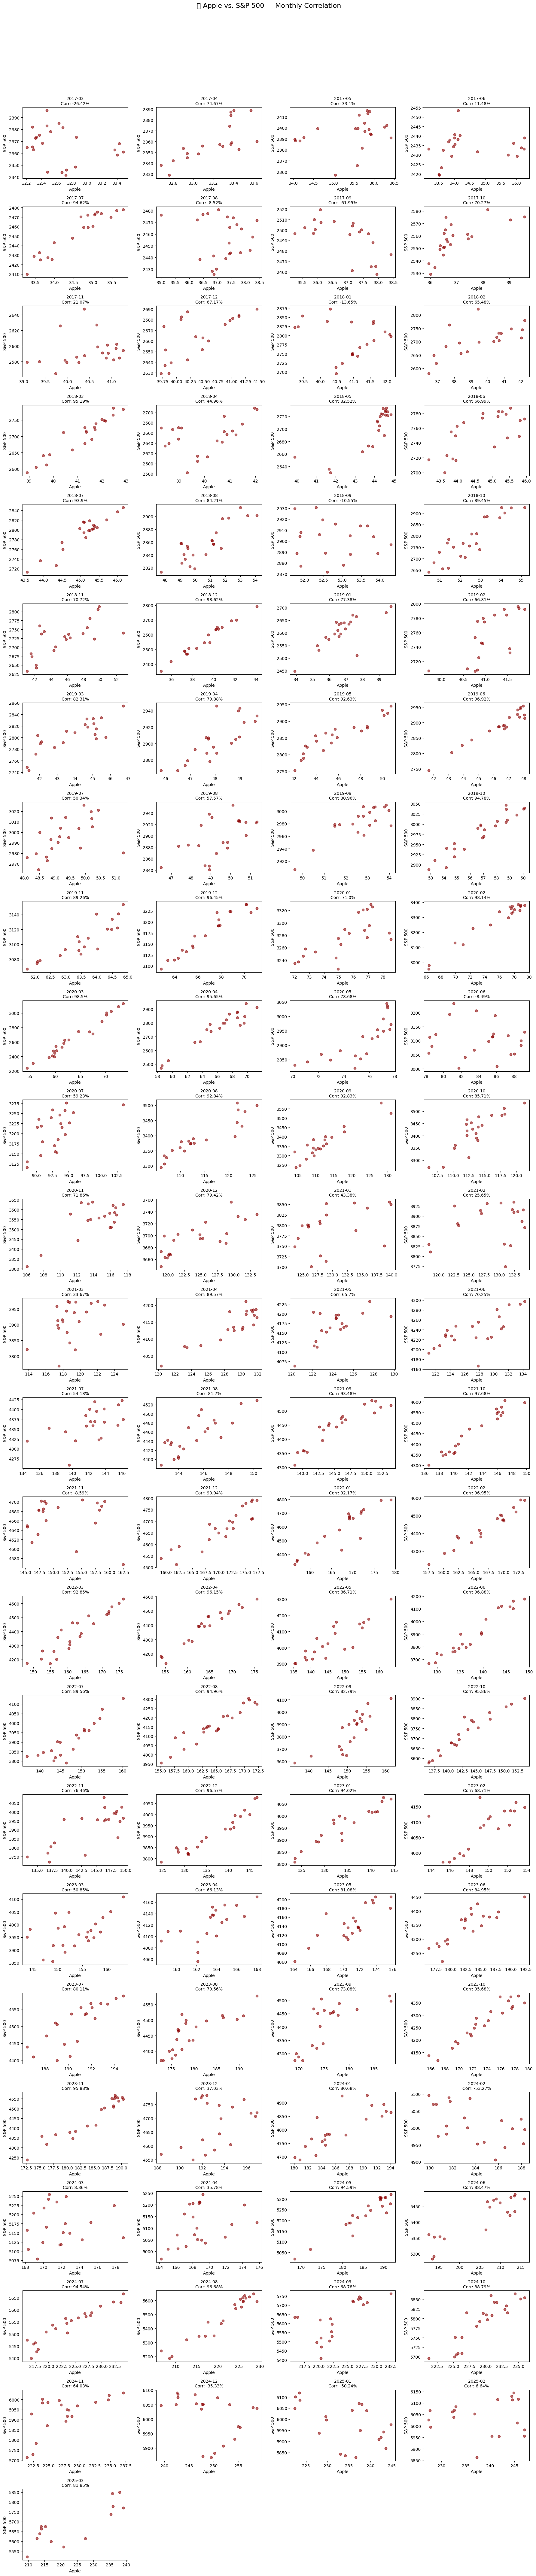

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Reuse already cleaned and date-converted data
apple_month = apple_cleaned[['Date', 'Close']].rename(columns={'Close': 'Apple_Close'})
sp500_month = sp500_cleaned[['Date', 'Close']].rename(columns={'Close': 'SP500_Close'})

# Merge on Date
df = pd.merge(apple_month, sp500_month, on='Date')

# Ensure datetime index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Create 'Month' column
df['Month'] = df.index.to_period('M')
months = df['Month'].unique()

# Setup subplot grid
n = len(months)
cols = 4
rows = n // cols + (n % cols > 0)

fig, axes = plt.subplots(rows, cols, figsize=(18, rows * 3.5))
axes = axes.flatten()

for i, month in enumerate(months):
    chunk = df[df['Month'] == month]

    ax = axes[i]
    ax.scatter(chunk['Apple_Close'], chunk['SP500_Close'], alpha=0.6, color='darkred')

    # Correlation
    corr = chunk['Apple_Close'].corr(chunk['SP500_Close'])
    corr_pct = round(corr * 100, 2) if pd.notna(corr) else "N/A"

    ax.set_title(f"{month}\nCorr: {corr_pct}%", fontsize=10)
    ax.set_xlabel("Apple")
    ax.set_ylabel("S&P 500")

# Hide any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("📊 Apple vs. S&P 500 — Monthly Correlation", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


<ipython-input-133-31c7eb80c855>:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_end_corr = rolling_corr.resample('M').last()


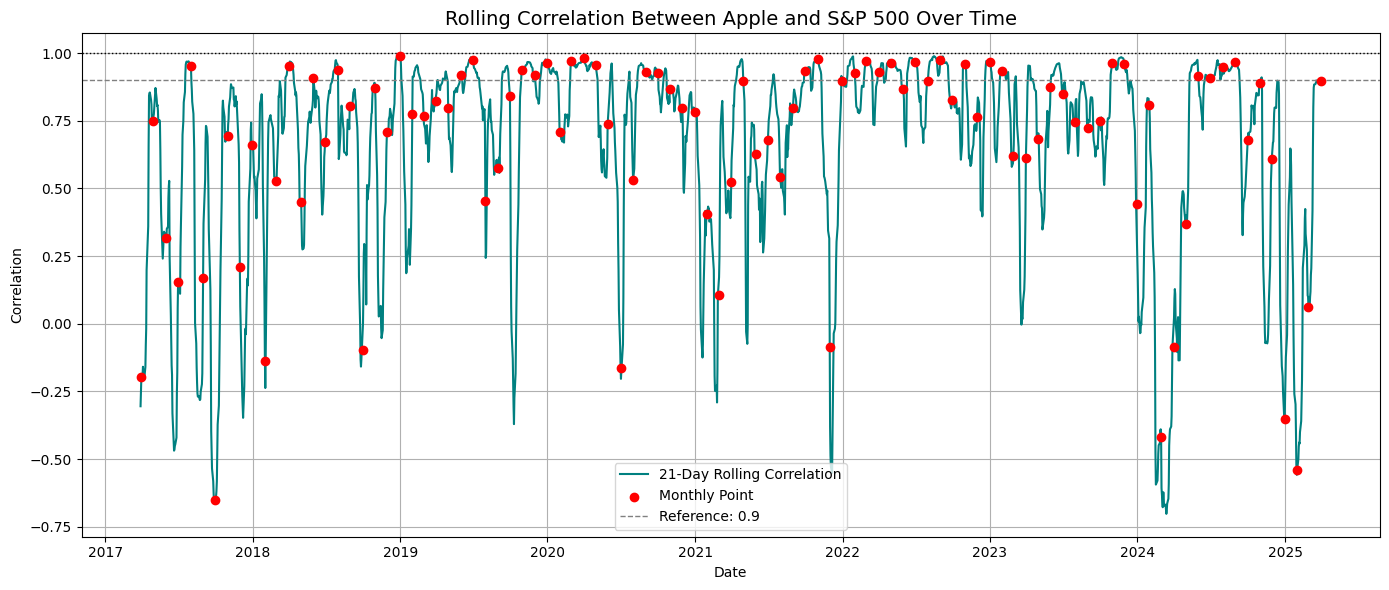

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Calculate 21-day rolling correlation
rolling_corr = df['Apple_Close'].rolling(window=21).corr(df['SP500_Close'])

# Extract last day of each month with available correlation
monthly_end_corr = rolling_corr.resample('M').last()

# Plot everything
plt.figure(figsize=(14, 6))
plt.plot(df.index, rolling_corr, color='teal', label='21-Day Rolling Correlation')
plt.scatter(monthly_end_corr.index, monthly_end_corr.values, color='red', label='Monthly Point', zorder=5)

# Reference lines
plt.axhline(0.9, color='gray', linestyle='--', linewidth=1, label='Reference: 0.9')
plt.axhline(1.0, color='black', linestyle=':', linewidth=1)

# Labels
plt.title('Rolling Correlation Between Apple and S&P 500 Over Time', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Correlation')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



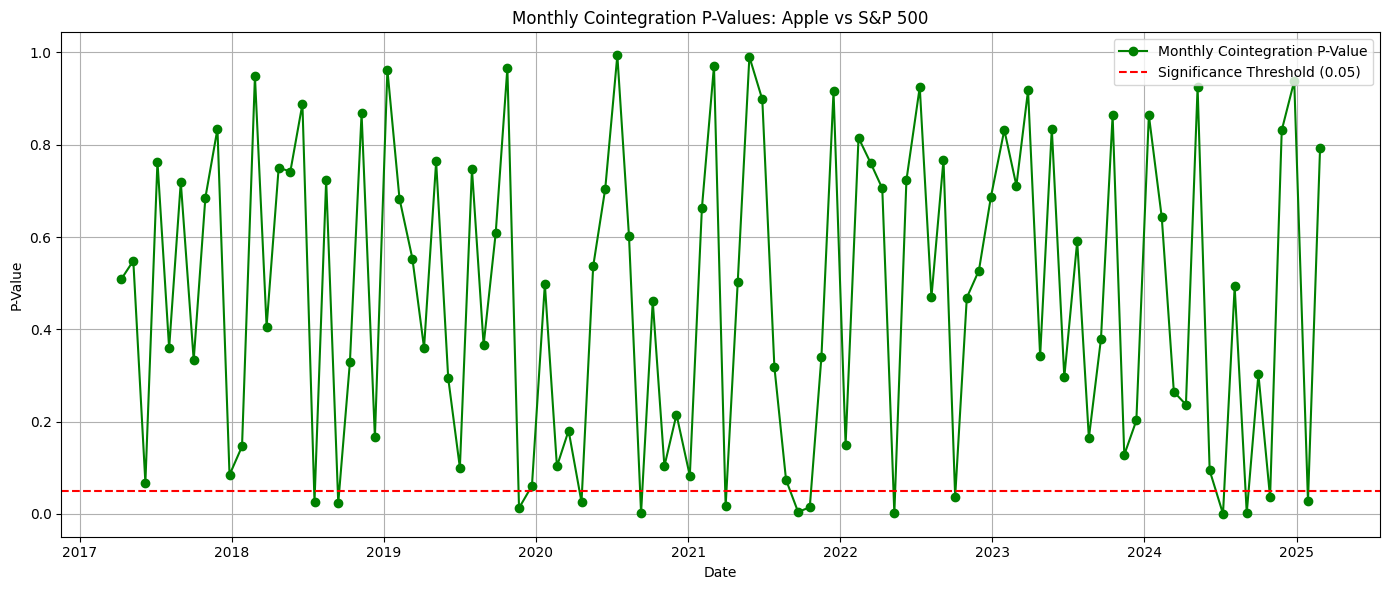

In [ ]:
from statsmodels.tsa.stattools import coint
import matplotlib.pyplot as plt
import pandas as pd

# Make sure the index is datetime
df.index = pd.to_datetime(df.index)

# Resample monthly and perform cointegration
monthly_pvals = []
monthly_labels = []

# Use 30-day rolling windows with monthly stepping
start_idx = 0
window = 30

while start_idx + window < len(df):
    chunk = df.iloc[start_idx:start_idx + window]
    apple = chunk['Apple_Close']
    sp500 = chunk['SP500_Close']

    # Skip if not enough data
    if len(apple) < 30:
        start_idx += 20
        continue

    # Perform cointegration test
    try:
        _, p_val, _ = coint(apple, sp500)
        monthly_pvals.append(p_val)
        monthly_labels.append(chunk.index[-1])  # label by end date
    except Exception as e:
        print(f"Skipping window ending {chunk.index[-1]}: {e}")

    start_idx += 20  # monthly stride (approx)

# === Plot ===
plt.figure(figsize=(14, 6))
plt.plot(monthly_labels, monthly_pvals, marker='o', color='green', label='Monthly Cointegration P-Value')
plt.axhline(0.05, color='red', linestyle='--', label='Significance Threshold (0.05)')
plt.title('Monthly Cointegration P-Values: Apple vs S&P 500')
plt.ylabel('P-Value')
plt.xlabel('Date')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
from statsmodels.tsa.stattools import coint

# Extract full series
apple = df['Apple_Close']
sp500 = df['SP500_Close']

# Run Engle-Granger cointegration test
_, p_value, _ = coint(apple, sp500)

# Print final result
print(f"📊 Overall Cointegration p-value: {p_value:.4f}")



📊 Overall Cointegration p-value: 0.2166


In [ ]:
!pip install backtesting


<ipython-input-136-e719bac2a615>:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace([np.inf, -np.inf], np.nan).dropna()  # Remove infinite values


Backtest.run:   0%|          | 0/2005 [00:00<?, ?bar/s]


====================== TRADE HISTORY =======================
Last 10 Trades Executed:
     EntryTime   ExitTime  Size  EntryPrice  ExitPrice      PnL  ReturnPct Duration
258 2024-08-07 2024-08-09     4      209.12   215.3936  25.0944   0.030000   2 days
259 2024-08-09 2024-08-14     4      215.52   221.9856  25.8624   0.030000   5 days
260 2024-08-14 2024-08-27     4      221.23   227.8669  26.5476   0.030000  13 days
261 2024-08-27 2024-09-03     4      227.53   220.7041 -27.3036  -0.030000   7 days
262 2024-09-03 2024-09-16     4      222.28   215.6116 -26.6736  -0.030000  13 days
263 2024-10-22 2024-10-23     3      235.34   228.2798 -21.1806  -0.030000   1 days
264 2024-10-23 2024-11-01     4      230.25   220.4800 -39.0800  -0.042432   9 days
265 2024-11-01 2024-11-06     4      222.42   222.2300  -0.7600  -0.000854   5 days
266 2024-12-11 2024-12-18     3      246.22   253.6066  22.1598   0.030000   7 days
267 2025-03-13 2025-03-19     4      209.68   215.9704  25.1616   0.03000

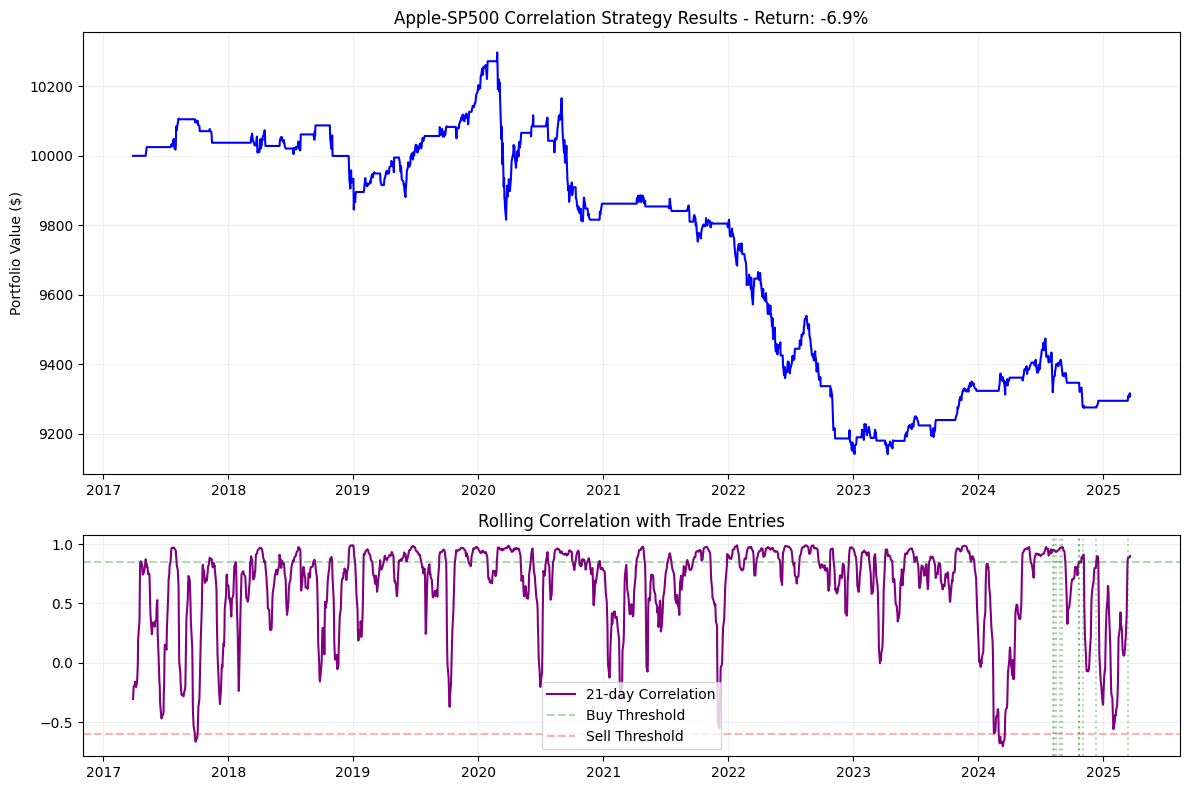


===================== STRATEGY RESULTS =====================
Period: 2017-03-29 to 2025-03-20
Return: -6.9%
Trades: 268
Win Rate: 54.1%
Max Drawdown: -11.2%


In [ ]:
from backtesting import Backtest, Strategy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Data Preparation and Merging
apple_cleaned['Date'] = pd.to_datetime(apple_cleaned['Date'])
sp500_cleaned['Date'] = pd.to_datetime(sp500_cleaned['Date'])

# Merge datasets on Date
df = pd.merge(apple_cleaned, sp500_cleaned, on='Date', how='inner',
              suffixes=('_A', '_SP500'))
df = df.sort_values('Date').reset_index(drop=True)

# 2. Calculate rolling correlation (21-day window)
df['RollingCorr'] = df['Close_A'].rolling(21).corr(df['Close_SP500'])

# 3. Filtering
df = df[df['RollingCorr'].notna()]  # Remove rows with NaN correlations
df = df.replace([np.inf, -np.inf], np.nan).dropna()  # Remove infinite values
df = df[df['Close_A'] > 0]  # Remove zero/negative prices

# 4. Prepare backtest data
bt_data = df[['Date', 'Open_A', 'High_A', 'Low_A', 'Close_A', 'Volume_A', 'RollingCorr']].copy()
bt_data.rename(columns={
    'Open_A': 'Open',
    'High_A': 'High',
    'Low_A': 'Low',
    'Close_A': 'Close',
    'Volume_A': 'Volume'
}, inplace=True)
bt_data = bt_data.set_index('Date')

# 5. Strategy Implementation
class AppleCorrelationStrategy(Strategy):
    window = 21  # Correlation window size

    def init(self):
        # We'll use the pre-calculated rolling correlation
        pass

    def next(self):
        if len(self.data.Close) < self.window:
            return  # Not enough data points

        current_corr = self.data.RollingCorr[-1]
        price = self.data.Close[-1]

        # Trading rules
        if self.position.is_long and current_corr < 0.7:
            self.position.close()
        elif self.position.is_short and current_corr > 0.4:
            self.position.close()
        elif not self.position:
            if current_corr > 0.85:
                self.buy(sl=price*0.97, tp=price*1.03, size=0.1)
            elif current_corr < -0.6:
                self.sell(sl=price*1.03, tp=price*0.97, size=0.1)

# 6. Run Backtest
try:
    bt = Backtest(bt_data, AppleCorrelationStrategy,
                 commission=0.002,
                 cash=10_000,
                 trade_on_close=True,
                 exclusive_orders=True)

    results = bt.run()

    # Display detailed trade information
    print(f"\n{' TRADE HISTORY ':=^60}")
    print("Last 10 Trades Executed:")
    trades_df = results._trades.tail(10)

    # Format trade display
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', 1000)
    print(trades_df[['EntryTime', 'ExitTime', 'Size', 'EntryPrice', 'ExitPrice',
                    'PnL', 'ReturnPct', 'Duration']].to_string())

    # Calculate trade stats
    winning_trades = trades_df[trades_df['PnL'] > 0]
    losing_trades = trades_df[trades_df['PnL'] <= 0]

    print(f"\n{' TRADE STATS ':=^60}")
    print(f"Winning Trades: {len(winning_trades)}/{len(trades_df)}")
    if len(winning_trades) > 0:
        print(f"Average Win: ${winning_trades['PnL'].mean():.2f}")
    print(f"Losing Trades: {len(losing_trades)}/{len(trades_df)}")
    if len(losing_trades) > 0:
        print(f"Average Loss: ${losing_trades['PnL'].mean():.2f}")

    # 7. Results Visualization
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), gridspec_kw={'height_ratios': [2, 1]})

    # Equity curve
    ax1.plot(results._equity_curve['Equity'], label='Equity Curve', color='blue')
    ax1.set_title(f"Apple-SP500 Correlation Strategy Results - Return: {results['Return [%]']:.1f}%")
    ax1.set_ylabel('Portfolio Value ($)')
    ax1.grid(alpha=0.2)

    # Correlation values with trades
    ax2.plot(bt_data.index, bt_data['RollingCorr'], label='21-day Correlation', color='purple')
    ax2.axhline(0.85, color='g', linestyle='--', alpha=0.3, label='Buy Threshold')
    ax2.axhline(-0.6, color='r', linestyle='--', alpha=0.3, label='Sell Threshold')

    # Mark trade entries
    for trade in trades_df.itertuples():
        if trade.Size > 0:  # Long trades
            ax2.axvline(trade.EntryTime, color='green', alpha=0.3, linestyle=':')
        else:  # Short trades
            ax2.axvline(trade.EntryTime, color='red', alpha=0.3, linestyle=':')

    ax2.set_title('Rolling Correlation with Trade Entries')
    ax2.legend()
    ax2.grid(alpha=0.2)
    plt.tight_layout()
    plt.show()

    # Print performance metrics
    print(f"\n{' STRATEGY RESULTS ':=^60}")
    print(f"Period: {results['Start'].date()} to {results['End'].date()}")
    print(f"Return: {results['Return [%]']:.1f}%")
    print(f"Trades: {results['# Trades']}")
    print(f"Win Rate: {results['Win Rate [%]']:.1f}%")
    print(f"Max Drawdown: {results['Max. Drawdown [%]']:.1f}%")
    print("="*60)

except Exception as e:
    print(f"Backtest failed: {str(e)}")
    print("\nDEBUGGING INFO:")
    print("Final bt_data samples:")
    print(bt_data.tail())
    print("\nCorrelation stats:")
    print(bt_data['RollingCorr'].describe())

<ipython-input-139-de6dea3c4ca9>:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sp500_data = sp500_data.replace([np.inf, -np.inf], np.nan).dropna()


Backtest.run:   0%|          | 0/2005 [00:00<?, ?bar/s]


🔥 LAST 10 SP500 TRADES:
     EntryTime   ExitTime  Size  EntryPrice  ExitPrice       PnL  ReturnPct
138 2024-05-09 2024-06-07     1     5214.08  5370.5024  156.4224   0.030000
139 2024-06-13 2024-07-10     1     5433.74  5596.7522  163.0122   0.030000
140 2024-07-10 2024-07-24     1     5633.91  5464.8927 -169.0173  -0.030000
141 2024-07-24 2024-08-05     1     5427.13  5151.1400 -275.9900  -0.050854
142 2024-08-05 2024-08-09     1     5186.33  5341.9199  155.5899   0.030000
143 2024-08-09 2024-08-15     1     5344.16  5504.4848  160.3248   0.030000
144 2024-08-15 2024-09-16     1     5543.22  5633.0900   89.8700   0.016213
145 2024-10-22 2024-11-06     1     5851.20  5929.0400   77.8400   0.013303
146 2024-12-11 2024-12-18     1     6084.19  5901.6643 -182.5257  -0.030000
147 2025-03-13 2025-03-17     1     5521.52  5687.1656  165.6456   0.030000

📊 PERFORMANCE METRICS
Period: 2017-03-29 to 2025-03-20
Return: -3.2%
Trades: 148
Win Rate: 56.8%


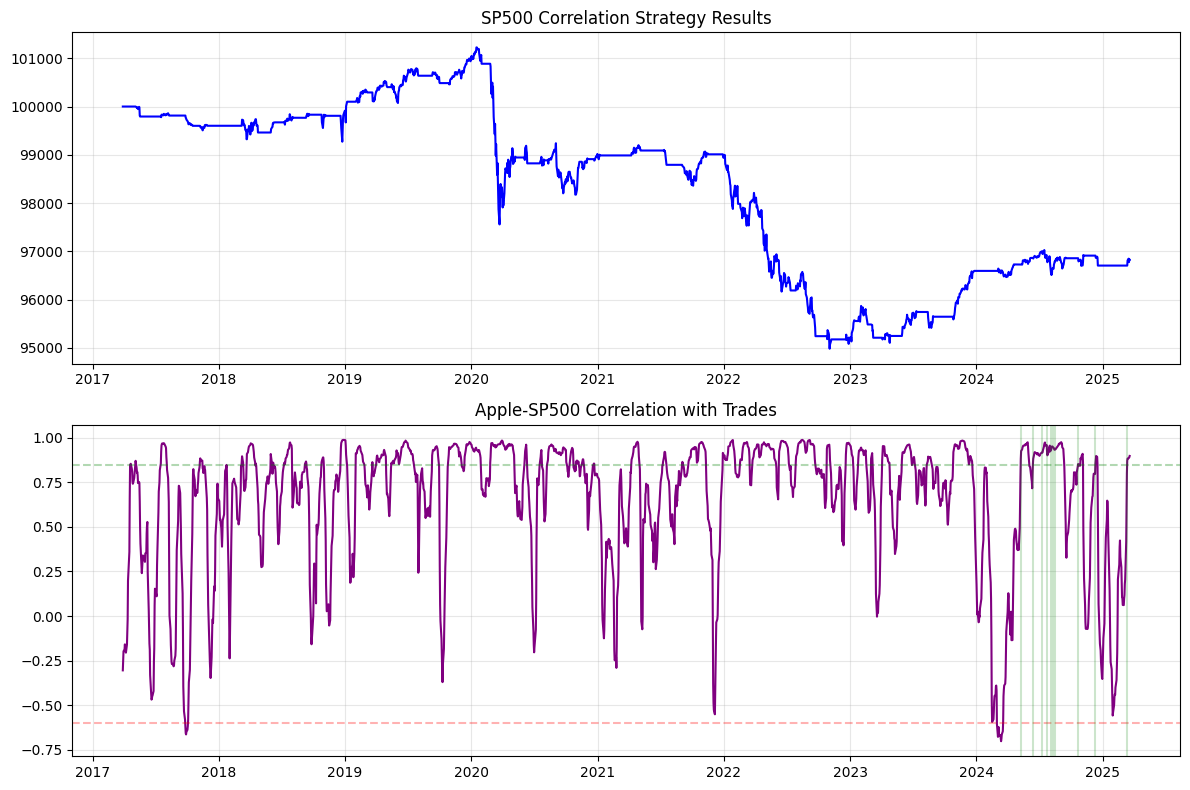

In [ ]:
from backtesting import Backtest, Strategy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Data Preparation and Merging
apple_cleaned['Date'] = pd.to_datetime(apple_cleaned['Date'])
sp500_cleaned['Date'] = pd.to_datetime(sp500_cleaned['Date'])

# Merge datasets on Date
df = pd.merge(apple_cleaned, sp500_cleaned, on='Date', how='inner',
              suffixes=('_A', '_SP500'))
df = df.sort_values('Date').reset_index(drop=True)

# 2. Calculate rolling correlation (21-day window)
df['RollingCorr'] = df['Close_A'].rolling(21).corr(df['Close_SP500'])

# 3. Filtering and prepare SP500 data
sp500_data = df[df['RollingCorr'].notna()].copy()
sp500_data = sp500_data.replace([np.inf, -np.inf], np.nan).dropna()
sp500_data = sp500_data[sp500_data['Close_SP500'] > 0]

# Create bt_data with SP500 columns
bt_data = sp500_data[['Date', 'Open_SP500', 'High_SP500', 'Low_SP500',
                     'Close_SP500', 'Volume_SP500', 'RollingCorr']].copy()
bt_data.rename(columns={
    'Open_SP500': 'Open',
    'High_SP500': 'High',
    'Low_SP500': 'Low',
    'Close_SP500': 'Close',
    'Volume_SP500': 'Volume'
}, inplace=True)
bt_data = bt_data.set_index('Date')

# 4. Strategy Implementation (now trading SP500)
class SP500CorrelationStrategy(Strategy):
    window = 21  # Correlation window size

    def init(self):
        pass  # Using pre-calculated rolling correlation

    def next(self):
        if len(self.data.Close) < self.window:
            return

        current_corr = self.data.RollingCorr[-1]
        price = self.data.Close[-1]  # Now trading SP500 price

        # Trading rules (same thresholds)
        if self.position.is_long and current_corr < 0.7:
            self.position.close()
        elif self.position.is_short and current_corr > 0.4:
            self.position.close()
        elif not self.position:
            if current_corr > 0.85:
                self.buy(sl=price*0.97, tp=price*1.03, size=0.1)
            elif current_corr < -0.6:
                self.sell(sl=price*1.03, tp=price*0.97, size=0.1)

# 5. Run Backtest
try:
    bt = Backtest(bt_data, SP500CorrelationStrategy,
                 commission=0.002,
                 cash=100_000,
                 trade_on_close=True,
                 exclusive_orders=True)

    results = bt.run()

    # Display last 10 trades
    print("\n🔥 LAST 10 SP500 TRADES:")
    trades_df = results._trades.tail(10)
    pd.set_option('display.width', 1000)
    print(trades_df[['EntryTime', 'ExitTime', 'Size', 'EntryPrice',
                    'ExitPrice', 'PnL', 'ReturnPct']].to_string())

    # Performance metrics
    print("\n📊 PERFORMANCE METRICS")
    print(f"Period: {results['Start'].date()} to {results['End'].date()}")
    print(f"Return: {results['Return [%]']:.1f}%")
    print(f"Trades: {results['# Trades']}")
    print(f"Win Rate: {results['Win Rate [%]']:.1f}%")

    # Visualization
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

    # Equity curve
    ax1.plot(results._equity_curve['Equity'], label='Equity Curve', color='blue')
    ax1.set_title(f"SP500 Correlation Strategy Results")
    ax1.grid(alpha=0.3)

    # Correlation with trades
    ax2.plot(bt_data['RollingCorr'], label='21-day Correlation', color='purple')
    ax2.axhline(0.85, color='green', linestyle='--', alpha=0.3)
    ax2.axhline(-0.6, color='red', linestyle='--', alpha=0.3)

    # Mark trades
    for trade in trades_df.itertuples():
        color = 'green' if trade.Size > 0 else 'red'
        ax2.axvline(trade.EntryTime, color=color, alpha=0.2)

    ax2.set_title('Apple-SP500 Correlation with Trades')
    ax2.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"Error: {str(e)}")
    print("\nData verification:")
    print(bt_data[['Close', 'RollingCorr']].tail())